# Project Problem Statement:
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.Check eligibility of the Customer given the inputs described above.

2.Identify customer segments from given data and categorize customer into one of the segments.
If customer is not eligible for the input required amount and duration:

3.1 What can be amount for the given duration. 3.2 If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

# Import libraries and dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
a=pd.read_csv("training_set.csv")

In [3]:
a.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


# Analysis of dataset

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [5]:
cat=[]
con=[]
for i in a.columns:
    if (a[i].dtype==object):
        cat.append(i)
    else:
        con.append(i)

In [6]:
a.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
a["Gender"].unique()

array(['Male', nan, 'Female'], dtype=object)

In [9]:
discrete_numerical_data=[]

for i in a[con]:
    if len(a[i].unique())<4:
        discrete_numerical_data.append(i)

In [10]:
discrete_numerical_data

['Credit_History']

# Missing data treatment

In [11]:
replacer=a["Credit_History"].mode()[0]
a["Credit_History"]=a["Credit_History"].fillna(replacer)


In [12]:
b=pd.DataFrame(a.isna().sum(),columns=["ct"])

In [13]:
c=b[b.ct>0].index

In [14]:
missings=list(c)

In [15]:
for i in missings:
    if a[i].dtypes=="object":
        replacer=a[i].mode()[0]
        a[i]=a[i].fillna(replacer)
    else:
        replacer=a[i].mean()
        a[i]=a[i].fillna(replacer)

    

In [16]:
a.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Splitting data & dropping unnecessary columns

In [17]:
x=a.drop(labels=["Loan_Status","Loan_ID"],axis=1)

In [18]:
y=a[["Loan_Status"]]

In [19]:
cat=[]
con=[]
for i in x:
    if (a[i].dtype==object):
        cat.append(i)
    else:
        con.append(i)

In [20]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [21]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [22]:
con.remove("Credit_History")

In [23]:
cat.append("Credit_History")

In [24]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [25]:
con

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# EDA

In [26]:
#cat vs cat --> bar plot

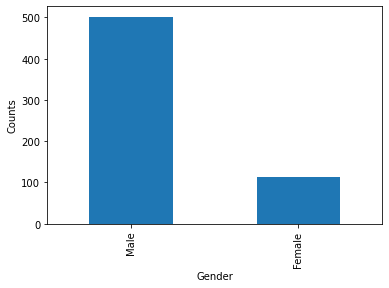

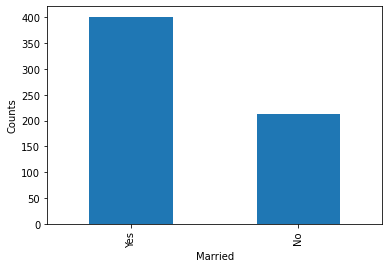

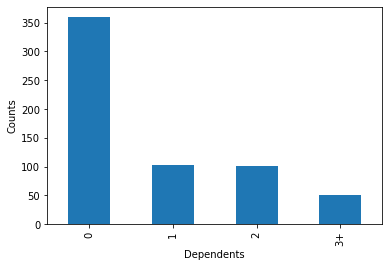

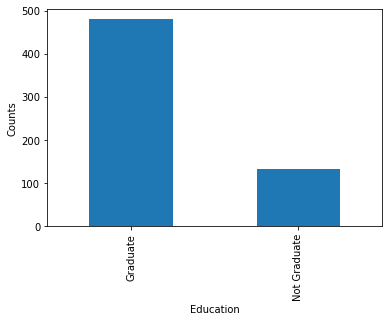

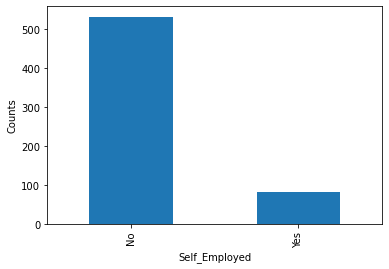

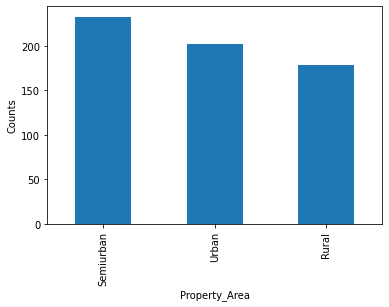

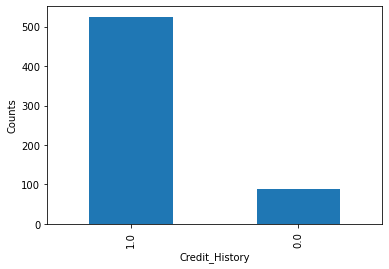

In [27]:
# For Categotical Data.
for i in x[cat]:
    a[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

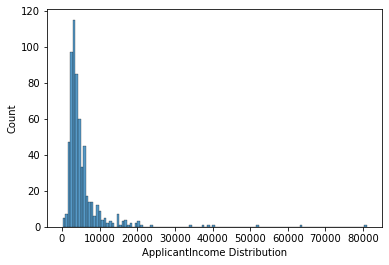

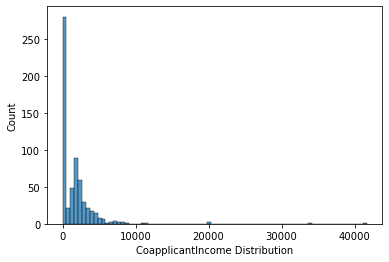

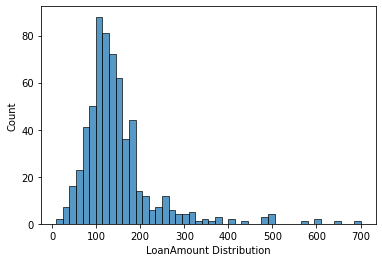

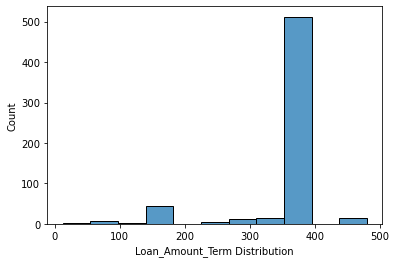

In [28]:
# For Continuous Numerical Data
for i in x[con]:
    sb.histplot(a[i])
    plt.xlabel(i+" Distribution")
    plt.show()

In [29]:
a[a.ApplicantIncome>70000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000.0,0.0,360.0,360.0,0.0,Rural,N


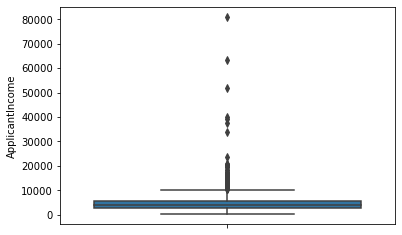

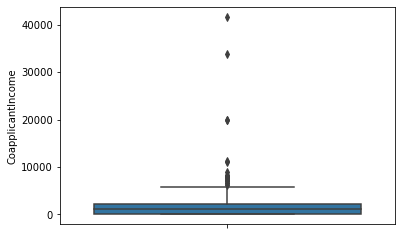

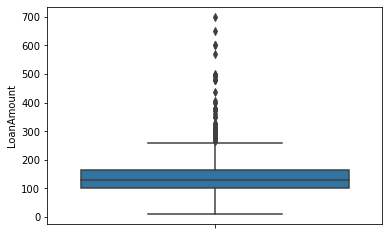

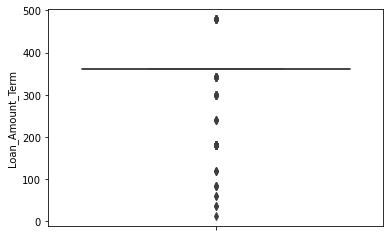

In [30]:
for i in x[con]:
    sb.boxplot(data = a, y=i)
    plt.show()

# categorical

In [31]:
x[cat].head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1.0
1,Male,Yes,1,Graduate,No,Rural,1.0


In [32]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in x[cat]:
    x[i]=lb.fit_transform(x[i])

In [33]:
x1=x[cat]

# contineous

In [34]:
x[con]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.00000,0.0,146.412162,360.0
1,5405.54085,1508.0,128.000000,360.0
2,3000.00000,0.0,66.000000,360.0
3,2583.00000,2358.0,120.000000,360.0
4,6000.00000,0.0,141.000000,360.0
...,...,...,...,...
609,2900.00000,0.0,71.000000,360.0
610,4106.00000,0.0,40.000000,180.0
611,8072.00000,240.0,253.000000,360.0
612,7583.00000,0.0,187.000000,360.0


In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x2=pd.DataFrame(ss.fit_transform(x[con]),columns=con)

In [36]:
x=x1.join(x2)

In [37]:
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,2,1,0.072651,-0.554368,0.000000,0.279851
1,1,1,1,0,0,0,1,0.000000,-0.038610,-0.219273,0.279851


In [38]:
x.shape

(614, 11)

# Model making

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=34)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=22,max_depth=3)
rf = RandomForestClassifier(random_state=22,max_depth=3)
ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=22))

In [40]:
    z=[lr,dt,rf,ab]
    for i in z:
        
        model=i.fit(xtrain,ytrain)
        pred_ts = model.predict(xtest)
        pred_tr = model.predict(xtrain)
        from sklearn.metrics import accuracy_score
        ts_acc = round(accuracy_score(ytest,pred_ts),3)
        tr_acc = round(accuracy_score(ytrain,pred_tr),3)
        print(i)
        print("training accuracy: ",tr_acc,"\ntesting_accuracy: ",ts_acc)
        if(tr_acc>ts_acc):
            print("Model overfits")
        else:
            print("No overfitting")
        print("-------------------")

LogisticRegression()
training accuracy:  0.819 
testing_accuracy:  0.789
Model overfits
-------------------
DecisionTreeClassifier(max_depth=3, random_state=22)
training accuracy:  0.823 
testing_accuracy:  0.789
Model overfits
-------------------
RandomForestClassifier(max_depth=3, random_state=22)
training accuracy:  0.819 
testing_accuracy:  0.789
Model overfits
-------------------
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=22))
training accuracy:  1.0 
testing_accuracy:  0.707
Model overfits
-------------------


# testing data

In [41]:
m=pd.read_csv("testing_set.csv")
replacer=m["Credit_History"].mode()[0]
m["Credit_History"]=m["Credit_History"].fillna(replacer)
n=pd.DataFrame(m.isna().sum(),columns=["ct"])
p=n[n.ct>0].index
missings=list(c)
for i in missings:
    if m[i].dtypes=="object":
        replacer=m[i].mode()[0]
        m[i]=m[i].fillna(replacer)
    else:
        replacer=m[i].mean()
        m[i]=m[i].fillna(replacer)
xb=m.drop(labels=["Loan_ID"],axis=1)

cat1=[]
con1=[]
for i in xb:
    if (m[i].dtype=="object"):
        cat1.append(i)
    else:
        con1.append(i)
con1.remove("Credit_History")
cat1.append("Credit_History")
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
for i in xb[cat1]:
    xb[i]=lb1.fit_transform(xb[i])
xb1=xb[cat1]
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
xs2=pd.DataFrame(ss1.fit_transform(xb[con1]),columns=con1)
X=xb1.join(xs2)
X.head(2)



,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,0,0,0,2,1,0.186461,-0.673335,-0.429368,0.270603
1,1,1,1,0,0,2,1,-0.352692,-0.029848,-0.166482,0.270603


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   Property_Area      367 non-null    int32  
 6   Credit_History     367 non-null    int64  
 7   ApplicantIncome    367 non-null    float64
 8   CoapplicantIncome  367 non-null    float64
 9   LoanAmount         367 non-null    float64
 10  Loan_Amount_Term   367 non-null    float64
dtypes: float64(4), int32(6), int64(1)
memory usage: 23.1 KB


In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   Property_Area      614 non-null    int32  
 6   Credit_History     614 non-null    int64  
 7   ApplicantIncome    614 non-null    float64
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
dtypes: float64(4), int32(6), int64(1)
memory usage: 38.5 KB


In [44]:
dt = DecisionTreeClassifier(max_depth=5,random_state=55)
model = dt.fit(x,y)
predicted_Loan_Status = model.predict(X)

In [45]:
m["Loan_Status"]=predicted_Loan_Status

In [72]:
m

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000000,360.000000,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000000,360.000000,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000000,360.000000,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000000,360.000000,1.0,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000000,360.000000,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.000000,360.000000,1.0,Urban,N
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.000000,360.000000,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.000000,360.000000,0.0,Rural,N
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.000000,240.000000,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.000000,360.000000,1.0,Semiurban,Y


In [75]:
m.Loan_Status.value_counts()

Y    264
N    103
Name: Loan_Status, dtype: int64